# [모델 성능 평가지표(Metric)](https://scikit-learn.org/stable/modules/model_evaluation.html#)
> 실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정하는 방법


# [이진 분류 모형](https://cypision.github.io/machine-learning/Imbalanced_Precision_Recall_Curve/)

### [ROC curve(Receiver Operating Characteristic curve)](https://sinyi-chou.github.io/classification-auc/)
- FPR를 X축으로, TPR을 Y축으로 정의하여 둘간의 관계를 표현한 그래프  
  - $ FPR = {FP \over FP + TN} $
  - $ TPR = {TP \over FN + TP} $

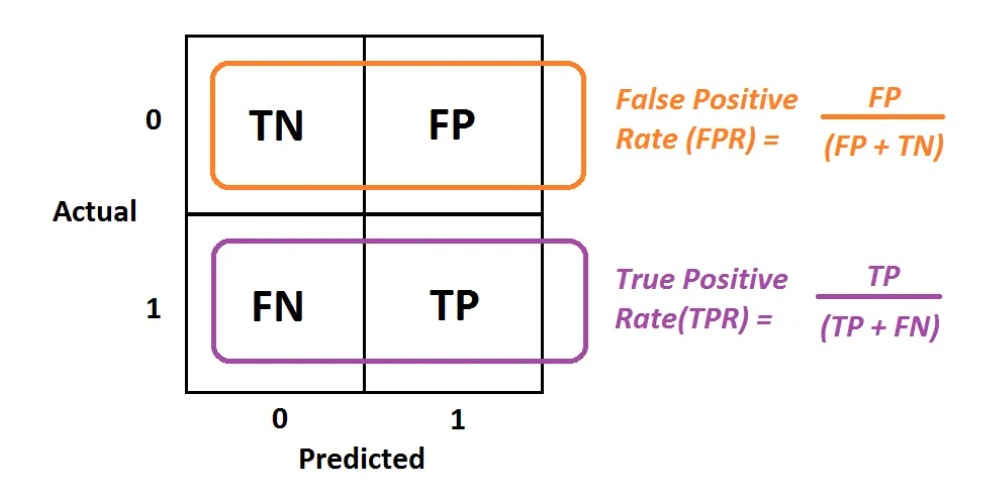

#### AUROC (Area Under ROC curve)
- ROC Curve의 밑부분 면적
- 넓을수록 모형 성능이 좋다.
- 임계값(threshold)이 어떻게 선택되었는지와 무관하게 모델의 예측 품질을 측정할 수 있다.
  - Poor model: 0.5 ~ 0.7
  - Fair model: 0.7 ~ 0.8
  - Good model: 0.8 ~ 0.9
  - Excellent model: 0.9 ~ 1.0

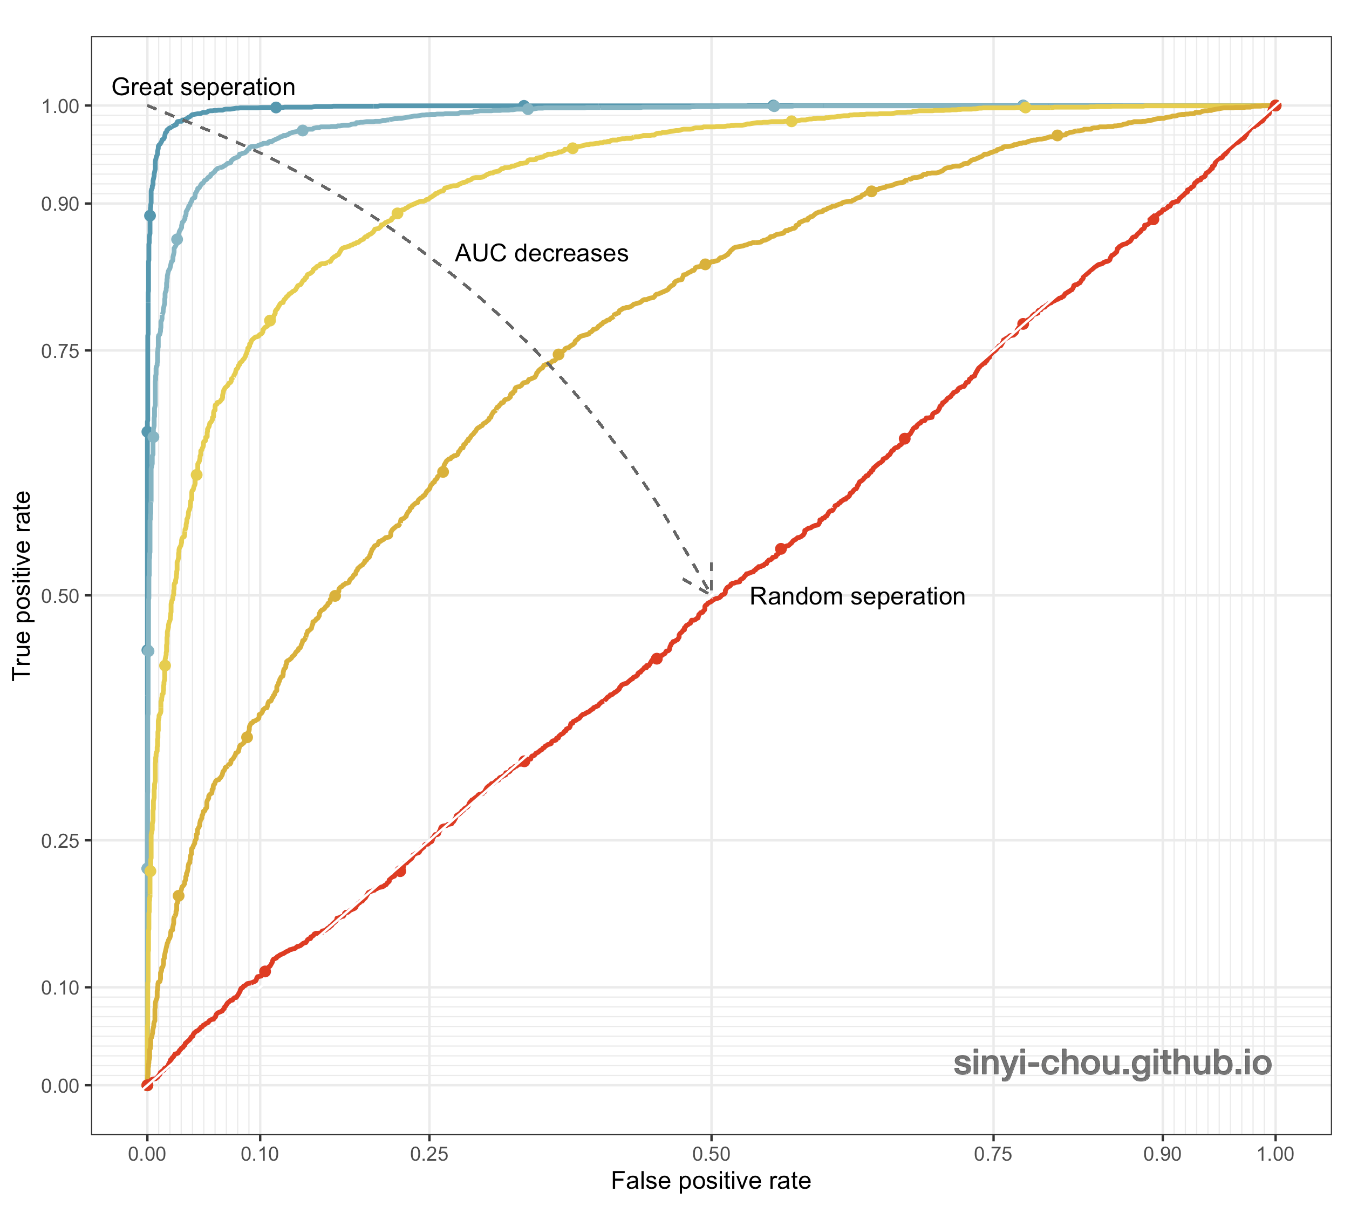

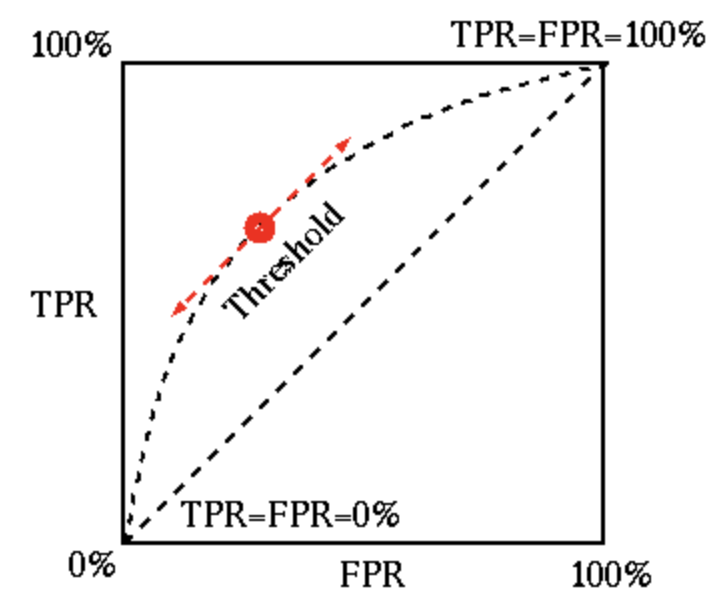

![img](https://sinyi-chou.github.io/images/classification/classification_threshold.gif)
![img](https://sinyi-chou.github.io/images/classification/roc_plot_animation.gif)

# 예제

## Load Data

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits

# 0 ~ 9 손글씨 데이터
digits = load_digits()
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


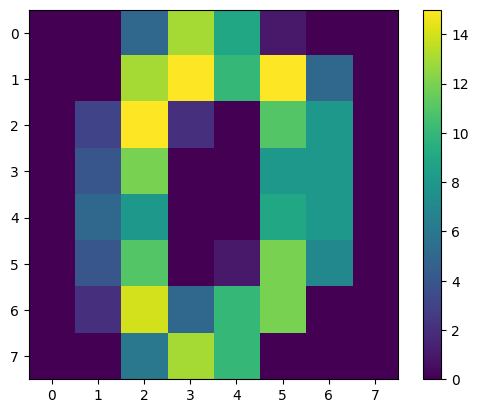

In [2]:
import matplotlib.pyplot as plt

plt.imshow(digits.data[0].reshape(8,8))
plt.colorbar()
plt.show()

### 이진 데이터로 변환

In [3]:
data = digits.data

# Binary Classifier
target = (digits.target == 5).astype(int)

### train_test_split

In [4]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_valid, y_train, y_valid = train_test_split(data, target, random_state=SEED)

x_train.shape , x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

## Modeling

### DecisionTreeClassifier

In [5]:
from sklearn.tree import DecisionTreeClassifier
# 모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=SEED)
# 모델 학습
tree.fit(x_train,y_train)
# 모델 평가: predict -> predict_proba(확률)을 이용해 threshold를 적용할 결과
pred_tree = tree.predict(x_valid)

### DummyClassifier

In [6]:
from sklearn.dummy import DummyClassifier
# 모델 정의
dummy = DummyClassifier(strategy='most_frequent')
# 모델 학습 > x_train(features, matrix), y_train(target, vactor)
dummy.fit(x_train,y_train)

DummyClassifier(strategy='most_frequent')

In [7]:
pred_dummy = dummy.predict_proba(x_valid)[:,1] # 1에 대한 확률만 가져오겠다.
pred_tree = tree.predict_proba(x_valid)[:,1]

## 평가

### AUC

In [8]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_valid,pred_dummy)
print(f'dummy: {auc(fpr, tpr)}')
print('-'*50)
fpr, tpr, thresholds = roc_curve(y_valid,pred_tree)
print(f'model: {auc(fpr, tpr)}')

dummy: 0.5
--------------------------------------------------
model: 0.9479604664268065


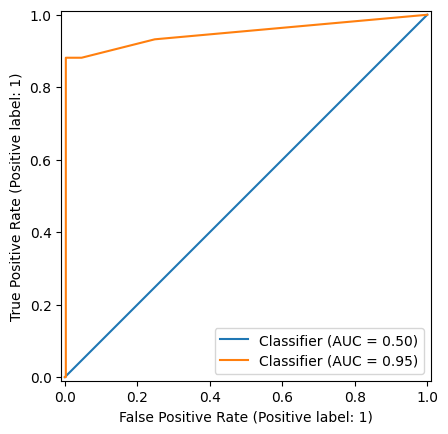

In [9]:
from sklearn.metrics import RocCurveDisplay

fig,ax = plt.subplots()
RocCurveDisplay.from_predictions(y_valid,pred_dummy,ax=ax)
RocCurveDisplay.from_predictions(y_valid,pred_tree,ax=ax)
plt.show()

### confusion_matrix

In [15]:
from sklearn.metrics import confusion_matrix

pred_tree = tree.predict(x_valid)
conf_mx = confusion_matrix(y_valid, pred_tree, normalize='true')
conf_mx

array([[0.99744246, 0.00255754],
       [0.11864407, 0.88135593]])

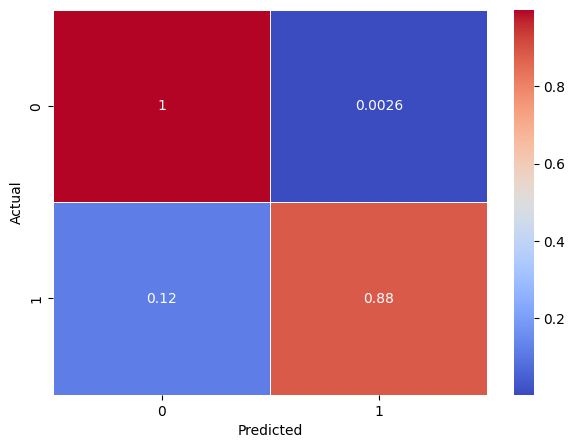

In [16]:
import seaborn as sns

plt.figure(figsize=(7,5))

sns.heatmap(conf_mx, annot=True, cmap="coolwarm", linewidth=0.5)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()